In [25]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_excel('d:/Pythoning/test_task/test.xlsx', index_col=None, dtype = 
                     {
                        'Retention' : int, 'MaxLevelPassed' : int, 'User_id' : int, 'SumRevenue' : int, 'CountBuy' : int,
                     'Get_Ads' : int, 'Get_Chapter' : int, 'Get_Buy' : int, 'Get_Faceb' : int, 'Get_TeamL' : int, 'Get_TeamT' : int,})

In [27]:
data.head()

,Retention,MaxLevelPassed,User_id,AB_Cohort,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,...,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,0,46,1,A,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,46,2,A,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,15,3,A,0,0,18.0,15.0,14.0,11.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,4,A,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,5,A,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df = data

In [29]:
df

,Retention,MaxLevelPassed,User_id,AB_Cohort,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,...,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,0,46,1,A,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,46,2,A,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,15,3,A,0,0,18.0,15.0,14.0,11.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,4,A,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,5,A,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25377,0,16,4340,B,76,1,23.0,19.0,17.0,14.0,...,2000,0,0,0,0.0,0.0,0.0,0.0,1980.0,0.0
25378,0,9,4341,B,0,0,13.0,9.0,9.0,7.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2590.0,0.0
25379,1,22,4341,B,0,0,33.0,13.0,25.0,7.0,...,0,0,0,100,0.0,0.0,0.0,0.0,0.0,0.0
25380,2,25,4341,B,0,0,6.0,3.0,4.0,2.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# кол-во пользователей по тестовым группам сделавших покупки

In [31]:
users_count  = df.groupby('AB_Cohort', as_index=False)\
                    .agg({'User_id':'nunique'})  \
                    .rename(columns={'User_id':'users_count'})

In [32]:
users_count

,AB_Cohort,users_count
0,A,4348
1,B,4341


In [33]:
users_did_b = df.query('SumRevenue > 0')\
     .groupby('AB_Cohort', as_index=False)\
    .agg({'User_id':'nunique'})\
    .rename(columns={'User_id':'users_did_bought'})

In [34]:
users_count["users_did_bought"]  = users_did_b["users_did_bought"] 

In [35]:
users_count

,AB_Cohort,users_count,users_did_bought
0,A,4348,25
1,B,4341,35


In [36]:
# Процент людей в группе сделавших покупку
users_count["Rate1"] = round(users_count.users_did_bought/users_count.users_count * 100, 2)

In [37]:
users_count

,AB_Cohort,users_count,users_did_bought,Rate1
0,A,4348,25,0.57
1,B,4341,35,0.81


In [38]:
# КОГОРТНЫЙ АНАЛИЗ

In [39]:
retention_A_group = df.query('AB_Cohort == "A"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'nunique'})  \
                    .rename(columns={'User_id':'users_count', 'Retention':'retention_day'})

In [40]:
retention_A_group

,retention_day,users_count
0,0,4317
1,1,1653
2,2,1342
3,3,1217
4,4,1153
5,5,1071
6,6,971
7,7,960


In [41]:
retention_B_group = df.query('AB_Cohort == "B"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'nunique'})  \
                    .rename(columns={'User_id':'users_count', 'Retention':'retention_day'})

In [42]:
# Retention (Удержание)

In [43]:
# День установки
users_install_B = retention_B_group[retention_B_group.retention_day == 0].users_count
users_install_A = retention_A_group[retention_A_group.retention_day == 0].users_count

In [44]:
users_install_B

0    4319
Name: users_count, dtype: int64

In [45]:
retention_B_group['users_install'] = 0
for i in retention_B_group['retention_day'].tolist():
    retention_B_group['users_install'][i] = users_install_B;

In [46]:
retention_A_group['users_install'] = 0
for i in retention_A_group['retention_day'].tolist():
    retention_A_group['users_install'][i] = users_install_A;

In [47]:
retention_A_group

,retention_day,users_count,users_install
0,0,4317,4317
1,1,1653,4317
2,2,1342,4317
3,3,1217,4317
4,4,1153,4317
5,5,1071,4317
6,6,971,4317
7,7,960,4317


In [48]:
retention_B_group["Retention"] = round(retention_B_group.users_count/retention_B_group.users_install * 100, 2 )
retention_A_group["Retention"] = round(retention_A_group.users_count/retention_A_group.users_install * 100, 2 )

Text(0, 0.5, 'Retention')

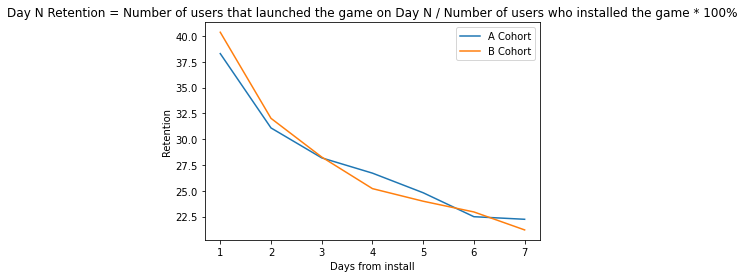

In [49]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.query("retention_day != 0").retention_day, retention_A_group.query("retention_day != 0").Retention, label='A Cohort')
plt.plot(retention_B_group.query("retention_day != 0").retention_day, retention_B_group.query("retention_day != 0").Retention, label='B Cohort')
plt.legend()
plt.title('Day N Retention = Number of users that launched the game on Day N / Number of users who installed the game * 100%')
plt.xlabel('Days from install')
plt.ylabel('Retention')

In [50]:
# ВЫВОД: Удержание стало снижаться в группе B после 3-го дня игры.

In [51]:
# ARPPU = Revenue / Paying Users

In [59]:
revenue_A_group = df.query('AB_Cohort == "A" & SumRevenue > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'nunique', 'SumRevenue':'sum'})  \
                    .rename(columns={'User_id':'Users_paying', 'Retention':'Retention_day'})

In [60]:
revenue_B_group = df.query('AB_Cohort == "B" & SumRevenue > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'User_id':'nunique', 'SumRevenue':'sum'})  \
                    .rename(columns={'User_id':'Users_paying', 'Retention':'Retention_day'})

In [61]:
revenue_B_group

,Retention_day,Users_paying,SumRevenue
0,0,20,6726
1,1,8,4498
2,2,4,2528
3,3,8,3640
4,4,7,1122
5,5,1,189
6,6,4,2887
7,7,7,3718


In [63]:
retention_A_group["SumRevenue"] = revenue_A_group.SumRevenue.cumsum()
retention_B_group["SumRevenue"] = revenue_B_group.SumRevenue.cumsum()
retention_A_group["Users_paying"] = revenue_A_group.Users_paying.cumsum()
retention_B_group["Users_paying"] = revenue_B_group.Users_paying.cumsum()

In [64]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU
0,0,4317,4317,100.00,3346,11,304.18
1,1,1653,4317,38.29,4341,18,241.17
2,2,1342,4317,31.09,5086,24,211.92
3,3,1217,4317,28.19,5570,28,198.93
4,4,1153,4317,26.71,6513,32,203.53
5,5,1071,4317,24.81,6619,33,200.58
6,6,971,4317,22.49,7316,35,209.03
7,7,960,4317,22.24,8134,38,214.05


In [65]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying
0,0,4319,4319,100.00,6726,20
1,1,1743,4319,40.36,11224,28
2,2,1383,4319,32.02,13752,32
3,3,1221,4319,28.27,17392,40
4,4,1089,4319,25.21,18514,47
5,5,1036,4319,23.99,18703,48
6,6,991,4319,22.95,21590,52
7,7,916,4319,21.21,25308,59


In [66]:
retention_A_group["ARPPU"] = round(retention_A_group.SumRevenue/retention_A_group.Users_paying, 2)
retention_B_group["ARPPU"] = round(retention_B_group.SumRevenue/retention_B_group.Users_paying, 2)

In [67]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU
0,0,4317,4317,100.00,3346,11,304.18
1,1,1653,4317,38.29,4341,18,241.17
2,2,1342,4317,31.09,5086,24,211.92
3,3,1217,4317,28.19,5570,28,198.93
4,4,1153,4317,26.71,6513,32,203.53
5,5,1071,4317,24.81,6619,33,200.58
6,6,971,4317,22.49,7316,35,209.03
7,7,960,4317,22.24,8134,38,214.05


In [68]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU
0,0,4319,4319,100.00,6726,20,336.30
1,1,1743,4319,40.36,11224,28,400.86
2,2,1383,4319,32.02,13752,32,429.75
3,3,1221,4319,28.27,17392,40,434.80
4,4,1089,4319,25.21,18514,47,393.91
5,5,1036,4319,23.99,18703,48,389.65
6,6,991,4319,22.95,21590,52,415.19
7,7,916,4319,21.21,25308,59,428.95


Text(0, 0.5, 'ARPPU')

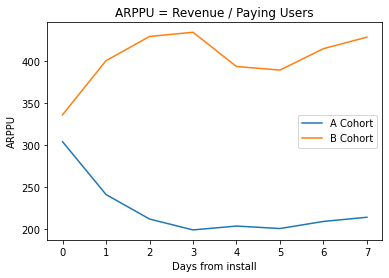

In [69]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.retention_day, retention_A_group.ARPPU, label = 'A Cohort')
plt.plot(retention_B_group.retention_day, retention_B_group.ARPPU, label = 'B Cohort')
plt.legend()
plt.title('ARPPU = Revenue / Paying Users')
plt.xlabel('Days from install')
plt.ylabel('ARPPU')

In [70]:
# ВЫВОД: Средняя доходность от одного платящего юзера в группе В выше

In [71]:
# Средний чек

In [72]:
count_buyings_A = df.query('AB_Cohort == "A"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'CountBuy':'sum'})

In [73]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU
0,0,4317,4317,100.00,3346,11,304.18
1,1,1653,4317,38.29,4341,18,241.17
2,2,1342,4317,31.09,5086,24,211.92
3,3,1217,4317,28.19,5570,28,198.93
4,4,1153,4317,26.71,6513,32,203.53
5,5,1071,4317,24.81,6619,33,200.58
6,6,971,4317,22.49,7316,35,209.03
7,7,960,4317,22.24,8134,38,214.05


In [74]:
retention_A_group["count_buyings"] = count_buyings_A.CountBuy.cumsum()

In [75]:
retention_A_group["Avg_Bill"] = round(retention_A_group.SumRevenue/retention_A_group.count_buyings,2)

In [76]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,count_buyings,Avg_Bill
0,0,4317,4317,100.00,3346,11,304.18,26,128.69
1,1,1653,4317,38.29,4341,18,241.17,33,131.55
2,2,1342,4317,31.09,5086,24,211.92,41,124.05
3,3,1217,4317,28.19,5570,28,198.93,49,113.67
4,4,1153,4317,26.71,6513,32,203.53,56,116.30
5,5,1071,4317,24.81,6619,33,200.58,58,114.12
6,6,971,4317,22.49,7316,35,209.03,63,116.13
7,7,960,4317,22.24,8134,38,214.05,69,117.88


In [77]:
count_buyings_B = df.query('AB_Cohort == "B"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'CountBuy':'sum'})

In [78]:
retention_B_group["count_buyings"] = count_buyings_B.CountBuy.cumsum()

In [79]:
retention_B_group["Avg_Bill"] = round(retention_B_group.SumRevenue/retention_B_group.count_buyings,2)

In [80]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,count_buyings,Avg_Bill
0,0,4319,4319,100.00,6726,20,336.30,33,203.82
1,1,1743,4319,40.36,11224,28,400.86,52,215.85
2,2,1383,4319,32.02,13752,32,429.75,61,225.44
3,3,1221,4319,28.27,17392,40,434.80,82,212.10
4,4,1089,4319,25.21,18514,47,393.91,92,201.24
5,5,1036,4319,23.99,18703,48,389.65,93,201.11
6,6,991,4319,22.95,21590,52,415.19,99,218.08
7,7,916,4319,21.21,25308,59,428.95,106,238.75


Text(0, 0.5, 'Avg Bill')

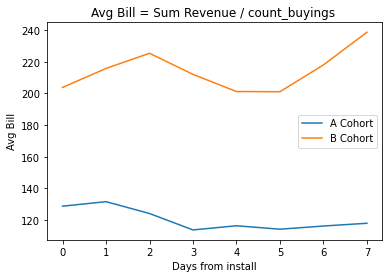

In [81]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.retention_day, retention_A_group.Avg_Bill, label = 'A Cohort')
plt.plot(retention_B_group.retention_day, retention_B_group.Avg_Bill, label = 'B Cohort')
plt.legend()
plt.title('Avg Bill = Sum Revenue / count_buyings ')
plt.xlabel('Days from install')
plt.ylabel('Avg Bill')

In [82]:
# ВЫВОД: Средний чек покупки в когорте B выше

In [83]:
# Среднее пройденное кол-во уровней -- может боксплот?

In [84]:
avg_level_A = round(df.query('AB_Cohort == "A"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'MaxLevelPassed':'mean'})  \
                    .rename(columns={'MaxLevelPassed':'avg_level', 'Retention':'retention_day'}),0)

In [85]:
avg_level_B = round(df.query('AB_Cohort == "B"')\
                    .groupby('Retention', as_index=False)\
                    .agg({'MaxLevelPassed':'mean'})  \
                    .rename(columns={'MaxLevelPassed':'avg_level', 'Retention':'retention_day'}),0)

In [86]:
avg_level_A

,retention_day,avg_level
0,0,24.0
1,1,35.0
2,2,40.0
3,3,43.0
4,4,46.0
5,5,48.0
6,6,50.0
7,7,51.0


Text(0, 0.5, 'Avg Level')

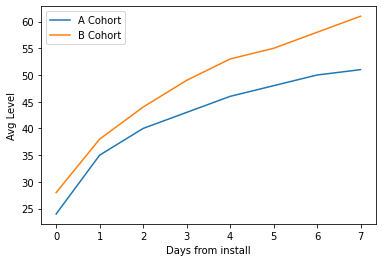

In [87]:
import matplotlib.pyplot as plt
plt.plot(avg_level_A.retention_day, avg_level_A.avg_level, label = 'A Cohort')
plt.plot(avg_level_B.retention_day, avg_level_B.avg_level, label = 'B Cohort')
plt.legend()
plt.xlabel('Days from install')
plt.ylabel('Avg Level')

In [88]:
# ВЫВОД: В кагорте B в среднем проходили больше уровней чем в когорте A

In [89]:
# Процент пользователей просмотревших рекламу

In [90]:
users_getAds_B = df.query('AB_Cohort == "B" & Get_Ads > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'Get_Ads':'nunique'})  \
                    .rename(columns={'Get_Ads':'users_getAds'})

In [91]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,count_buyings,Avg_Bill
0,0,4319,4319,100.00,6726,20,336.30,33,203.82
1,1,1743,4319,40.36,11224,28,400.86,52,215.85
2,2,1383,4319,32.02,13752,32,429.75,61,225.44
3,3,1221,4319,28.27,17392,40,434.80,82,212.10
4,4,1089,4319,25.21,18514,47,393.91,92,201.24
5,5,1036,4319,23.99,18703,48,389.65,93,201.11
6,6,991,4319,22.95,21590,52,415.19,99,218.08
7,7,916,4319,21.21,25308,59,428.95,106,238.75


In [92]:
retention_B_group["users_getAds"] = round(users_getAds_B.users_getAds.cumsum()/retention_B_group.users_count.cumsum()*100,2)

In [93]:
retention_B_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,count_buyings,Avg_Bill,users_getAds
0,0,4319,4319,100.00,6726,20,336.30,33,203.82,0.05
1,1,1743,4319,40.36,11224,28,400.86,52,215.85,0.07
2,2,1383,4319,32.02,13752,32,429.75,61,225.44,0.08
3,3,1221,4319,28.27,17392,40,434.80,82,212.10,0.09
4,4,1089,4319,25.21,18514,47,393.91,92,201.24,0.09
5,5,1036,4319,23.99,18703,48,389.65,93,201.11,0.09
6,6,991,4319,22.95,21590,52,415.19,99,218.08,0.10
7,7,916,4319,21.21,25308,59,428.95,106,238.75,0.11


In [94]:
users_getAds_A = df.query('AB_Cohort == "A" & Get_Ads > 0')\
                    .groupby('Retention', as_index=False)\
                    .agg({'Get_Ads':'count'})  \
                    .rename(columns={'Get_Ads':'users_getAds'})

In [97]:
retention_A_group["users_getAds"] = round(users_getAds_A.users_getAds.cumsum()/ retention_A_group.users_count.cumsum() * 100 ,2)

In [99]:
retention_A_group

,retention_day,users_count,users_install,Retention,SumRevenue,Users_paying,ARPPU,count_buyings,Avg_Bill,users_getAds
0,0,4317,4317,100.00,3346,11,304.18,26,128.69,4.15
1,1,1653,4317,38.29,4341,18,241.17,33,131.55,6.87
2,2,1342,4317,31.09,5086,24,211.92,41,124.05,7.70
3,3,1217,4317,28.19,5570,28,198.93,49,113.67,8.34
4,4,1153,4317,26.71,6513,32,203.53,56,116.30,8.84
5,5,1071,4317,24.81,6619,33,200.58,58,114.12,8.83
6,6,971,4317,22.49,7316,35,209.03,63,116.13,8.97
7,7,960,4317,22.24,8134,38,214.05,69,117.88,9.05


Text(0, 0.5, 'Percent Users who watched ads')

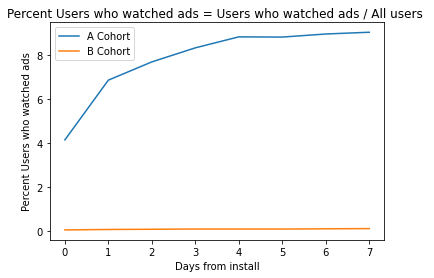

In [100]:
import matplotlib.pyplot as plt
plt.plot(retention_A_group.retention_day, retention_A_group.users_getAds, label = 'A Cohort')
plt.plot(retention_B_group.retention_day, retention_B_group.users_getAds, label = 'B Cohort')
plt.legend()
plt.title('Percent Users who watched ads = Users who watched ads / All users ')
plt.xlabel('Days from install')
plt.ylabel('Percent Users who watched ads')

In [101]:
# ВЫВОД: Процент пользователей просмотревших рекламу A группе В выше

In [102]:
# Кол-во собранного золота по сегментам

In [103]:
All_Got_Gold = df.groupby(["AB_Cohort", "Retention"], as_index=False)\
        .agg({'Get_Chapter' : 'sum', 'Get_Buy' : 'sum', 'Get_Faceb' : 'sum', 'Get_TeamL' : 'sum', 'Get_TeamT' : 'sum', 'User_id':'count'})

In [104]:
All_Got_Gold

,AB_Cohort,Retention,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,User_id
0,A,0,70040,102900,524000,5560,58900,4317
1,A,1,57150,42500,62000,4070,21700,1653
2,A,2,47020,35950,16000,4850,8100,1342
3,A,3,36800,12000,12000,4850,5200,1217
4,A,4,26690,26000,8000,3600,2800,1153
5,A,5,20420,18300,6000,3670,2900,1071
6,A,6,24420,24500,6000,2430,2100,971
7,A,7,19080,11000,6000,2100,1500,960
8,B,0,86010,126900,552000,3940,61900,4319
9,B,1,94660,47000,68000,3340,24700,1743


In [105]:
All_Got_Gold = All_Got_Gold.query("Retention != 0")

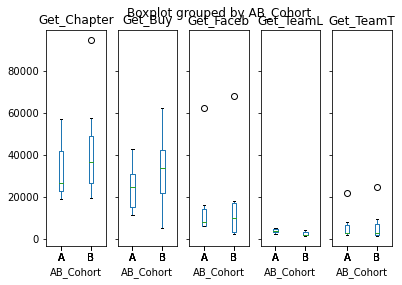

In [106]:
bp = All_Got_Gold.boxplot(column = ['Get_Chapter','Get_Buy', 'Get_Faceb','Get_TeamL','Get_TeamT'], by = 'AB_Cohort', grid = False, layout = (1,5))

In [ ]:
# Теперь нам необходимо проверить, какая из гипотез верна:
#* Нулевая гипотеза Н0 - конверсии равны.
#* Альтернативная гипотеза - конверсии не равны.

In [ ]:
# стат.критерий (p-value), Хи-квадрат

In [157]:
import statsmodels.stats.proportion as proportion

In [158]:
??proportion.proportions_chisquare

In [159]:
chi2start, pval, table = proportion.proportions_chisquare(users_count['users_did_bought'],users_count['users_count'])

In [160]:
alpha = 0.05

In [161]:
print(pval < alpha) # Можем ли мы отклонить нулевую гипотезу

True


In [ ]:
# ВЫВОД: Конверсии НЕ равны!